# InstagrAmy

## Instagram scraper

In [ ]:
import time
import urllib
import http
import pandas as pd
from copy import copy
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.action_chains import ActionChains
import os

def get_comment_and_link(x, driver):
    try:
        link = x.find_element_by_tag_name('a').get_attribute('href')
        hover = ActionChains(driver).move_to_element(x)
        hover.perform()
        time.sleep(1)
        comment_count = x.find_elements_by_class_name('-V_eO')[1].find_element_by_tag_name('span').text
        return (link, comment_count)
    except IndexError:
        return (None, None)
    
def scrape_links_and_comments(n_scrape = 0, target_name = None):
    n_scrape = n_scrape
    driver = webdriver.Chrome('C:/Users/sagar/Desktop/chromedriver.exe')  # Optional argument, if not specified will search path.
    driver.get('https://www.instagram.com');
    
    # How to actually scrape
    target = target_name # Change this to set your target
    driver.get('https://www.instagram.com/' + target +'/')
    
    # Scrolling up and down
    n_scrape2 = copy(n_scrape) - 12
    series_of_links = []
    while n_scrape2 > 0:
        series_of_pictures = None
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);") # One scroll down catches 12 images
        time.sleep(5)
        series_of_pictures = pd.Series(driver.find_elements_by_css_selector('div.v1Nh3.kIKUG._bz0w')[:-12]).apply(get_comment_and_link, args=(driver,))
        shortlist_links = series_of_pictures.tolist()
        for i in shortlist_links:
            series_of_links.append(i)
        n_scrape2 -= 12
        time.sleep(1)
    links = set(series_of_links)

    return links

In [ ]:
# From the scraper I ran earlier, we already have the comment counts and CSS selector links for our instagram posts
targets = ['shelbysorrel', 'eatingatx', 'bestfoodaustin']
base_path = "C:/Users/sagar/Desktop/My Work/McCombs Stuff/MSBA Courses/Spring Semester/Social Media Analytics/Final Project"

for i in targets:
    a = scrape_links_and_comments(200, target_name = i)
    df = pd.DataFrame(a)
    df = df.dropna(how = 'any', axis = 0)

    pics = []
    likes = []
    captions = []

    links = df[0].tolist()

    driver = webdriver.Chrome('C:/Users/sagar/Desktop/chromedriver.exe')  # Optional argument, if not specified will search path.

    for j, link in enumerate(links):
        driver.get(link)
        try:
            picture = driver.find_element_by_class_name('KL4Bh').find_element_by_tag_name('img').get_attribute('src')
            pics.append(picture)

            like_count = driver.find_element_by_class_name('zV_Nj').find_element_by_tag_name('span').text
            likes.append(like_count)

            caption_comments = driver.find_elements_by_class_name('C4VMK')
            caption = str()
            for item in caption_comments:
                span = item.find_element_by_tag_name('span').text
                caption = caption + span + '<<eoc>>'
            captions.append(caption)

            time.sleep(2)
        except NoSuchElementException:
            pics.append(None)
            likes.append(None)
            captions.append(None)
            time.sleep(1)

    df['pic_link'] = pics
    df['likes'] = likes
    df['caption'] = captions
    df = df.rename({'0':'link','1':'comments'}, axis=1)
    df = df.dropna(how = 'any', axis = 0)
    df.to_csv(os.path.join(base_path, str(i+".csv"))) # Change the file name

## The merger

Merge all scraped accounts into one big csv file.

In [ ]:
# merge all csvs into one. Add column which has the username of the person scraped.
import os
import re
import pandas as pd
import numpy as np

base_path = "C:/Users/sagar/Desktop/My Work/McCombs Stuff/MSBA Courses/Spring Semester/Social Media Analytics/Final Project"
filenames = [i for i in os.listdir(base_path) if "_scraped" in i]

merged_df = pd.DataFrame(columns = ['url', 'num_comments', 'image_link', 'num_likes', 'caption', 'insta_handle'])

# make a single df for all csvs
for file in filenames:
    file_path = os.path.join(base_path, file)
    df_to_append = pd.read_csv(file_path)
    df_to_append.drop('Unnamed: 0', inplace = True, axis = 1)
    df_to_append.columns = ['url', 'num_comments', 'image_link', 'num_likes', 'caption']
    df_to_append['insta_handle'] = re.findall("(.*)_scraped.csv", file)*len(df_to_append)
    merged_df = pd.concat([merged_df, df_to_append], axis = 0)

In [ ]:
merged_df.to_csv('Picture_get_google_labels.csv', index = False)

## The hashtag extractor
Lets extract all the hashtags that are being used in the captions to these photographs

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv(os.path.join(base_path, "tdgl-insta-final.csv"))

# Extract all hashtags in this csv
def extract_hash(comment):
    import re
    comment = re.sub("<<eoc>>", " ", comment)
    hash_list = re.findall("#([^\s]+)", comment)
    return hash_list
hashtags = df['caption'].map(lambda x: extract_hash(x))
hashtags = list(set([a for i in hashtags for a in i]))

In [ ]:
len(hashtags)

## Get stuff for hashtags

An idea that was scraped later

In [ ]:
# import time
# import urllib
# import http
# import pandas as pd
# from copy import copy
# from selenium import webdriver
# from selenium.common.exceptions import NoSuchElementException
# from selenium.webdriver.common.action_chains import ActionChains

# def get_comment_and_link(x, driver):
#     try:
#         link = x.find_element_by_tag_name('a').get_attribute('href')
#         hover = ActionChains(driver).move_to_element(x)
#         hover.perform()
#         time.sleep(1)
#         comment_count = x.find_elements_by_class_name('-V_eO')[1].find_element_by_tag_name('span').text
#         return (link, comment_count)
#     except IndexError:
#         return (None, None)
    
# def scrape_links_and_comments(n_scrape=0, target_name=None):
#     n_scrape = n_scrape
#     driver = webdriver.Chrome('C:/Users/sagar/Desktop/chromedriver.exe')  # Optional argument, if not specified will search path.
#     driver.get('https://www.instagram.com');
    
#     # How to actually scrape
#     target = target_name # Change this to set your target
#     driver.get('https://www.instagram.com/explore/tags/' + target +'/')
#     driver.execute_script("window.scrollTo(0, document.body.scrollHeight);") # One scroll down catches 45 images        

#     # Scrolling up and down
#     n_scrape2 = copy(n_scrape) - 21
#     series_of_links = []
#     while n_scrape2 > 0:
#         series_of_pictures = None
#         driver.execute_script("window.scrollTo(0, document.body.scrollHeight);") # One scroll down catches 45 images
#         time.sleep(5)
#         series_of_pictures = pd.Series(driver.find_elements_by_css_selector('div.v1Nh3.kIKUG._bz0w')[30:]).apply(get_comment_and_link, args=(driver,))
#         shortlist_links = series_of_pictures.tolist()
#         for i in shortlist_links:
#             series_of_links.append(i)
#         n_scrape2 -= 21
#         time.sleep(1)
#     links = set(series_of_links)

#     return links

In [ ]:
# # From the scraper I ran earlier, we already have the comment counts and CSS selector links for our instagram posts
# import os
# targets = hashtags
# base_path = "C:/Users/sagar/Desktop/My Work/McCombs Stuff/MSBA Courses/Spring Semester/Social Media Analytics/Final Project"

# for tag in targets:
#     a = scrape_links_and_comments(200, target_name = tag)
#     df = pd.DataFrame(a)
#     df = df.dropna(how = 'any', axis = 0)

#     pics = []
#     likes = []
#     captions = []

#     links = df[0].tolist()

#     driver = webdriver.Chrome('C:/Users/sagar/Desktop/chromedriver.exe')  # Optional argument, if not specified will search path.

#     for i, link in enumerate(links):
#         driver.get(link)
#         try:
#             like_count = driver.find_element_by_class_name('zV_Nj').find_element_by_tag_name('span').text
    
#             picture = driver.find_element_by_class_name('KL4Bh').find_element_by_tag_name('img').get_attribute('src')
        
#             caption_comments = driver.find_elements_by_class_name('C4VMK')
#             caption = str()
#             for item in caption_comments:
#                 span = item.find_element_by_tag_name('span').text
#                 caption = caption + span + '<<eoc>>'
#             captions.append(caption)
#             likes.append(like_count)
#             pics.append(picture)
            
#             time.sleep(2)
#         except NoSuchElementException:
#             pics.append(None)
#             likes.append(None)
#             captions.append(None)
#             time.sleep(1)

#     df['pic_link'] = pics
#     df['likes'] = likes
#     df['caption'] = captions
#     df = df.rename(columns = {'0':'link','1':'comments'}, axis=1)
#     df = df.dropna(how = 'any', axis = 0)
#     df.to_csv(os.path.join(base_path, str(tag+".csv"))) # Change the file name

## Google Cloud labels

In [1]:
import io
import os
from google.cloud.vision import types
from google.cloud import vision
import numpy as np
import urllib.request
import pandas as pd

In [2]:
## Calling the API using key
client = vision.ImageAnnotatorClient.from_service_account_file('C://Users//cherr//Downloads//SocialMedia-48509d145dcb.json')

In [3]:
client

In [4]:
## Reading the data
data = pd.read_csv('Picture_get_google_labels.csv')

In [5]:
## Cleaning the data
#data = data.rename(index=str, columns={0: "index", 1: "URL"})
data.dropna(inplace = True)

In [6]:
data.shape

(28, 6)

In [7]:
data.head()

,Unnamed: 0,link,comments,pic_link,likes,caption
0,0,https://www.instagram.com/p/BsobDcVlYRY/,13,https://instagram.fftw1-1.fna.fbcdn.net/vp/d9c...,139,#MondayMotivation is looking forward to @snhat...
1,1,https://www.instagram.com/p/BsLvIs5FZhB/,10,https://instagram.fftw1-1.fna.fbcdn.net/vp/0c3...,110,Want a *fresh* start to 2019? Sharing one of m...
2,2,https://www.instagram.com/p/BqiusYNlp3o/,12,https://instagram.fftw1-1.fna.fbcdn.net/vp/213...,65,Hope everyone had a good Thanksgiving and scor...
3,3,https://www.instagram.com/p/BrVrzPglj0k/,1,https://instagram.fftw1-1.fna.fbcdn.net/vp/b03...,86,Post-yoga brunch featuring @betterhalfbar : Au...
4,4,https://www.instagram.com/p/BrnqHQ2l0dg/,13,https://instagram.fftw1-1.fna.fbcdn.net/vp/65f...,89,Home for the holidays and decided to check out...


In [8]:
def image_tags(url):
    resp = urllib.request.urlopen(url)
    content = resp.read()
    image_tags = []
    image = vision.types.Image(content=content)
    response = client.label_detection(image=image)
    labels = response.label_annotations
    for label in labels:
        image_tags.append(label.description)
    return(image_tags)

In [9]:
data['google_image_tags'] = data['pic_link'].map(image_tags)

In [10]:
data.to_csv('google_image_tags_project.csv')

## Topic Modelling

Lets extract the main topics from the Amy's and the top 10 blogger's posts

In [2]:
import os, csv, lda, nltk
import pandas as pd
import numpy as np
from nltk.tokenize import PunktSentenceTokenizer, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from scipy import sparse
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

from nltk.tokenize import PunktSentenceTokenizer,RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [4]:
labels=pd.read_csv('google_image_tags_project.csv')

In [5]:
labels.head()

,Unnamed: 0,Unnamed: 0.1,link,comments,pic_link,likes,caption,google_image_tags
0,0,0,https://www.instagram.com/p/BsobDcVlYRY/,13,https://instagram.fftw1-1.fna.fbcdn.net/vp/d9c...,139,#MondayMotivation is looking forward to @snhat...,"['Drink', 'Distilled beverage', 'Alcoholic bev..."
1,1,1,https://www.instagram.com/p/BsLvIs5FZhB/,10,https://instagram.fftw1-1.fna.fbcdn.net/vp/0c3...,110,Want a *fresh* start to 2019? Sharing one of m...,"['Dish', 'Food', 'Cuisine', 'Meal', 'Ingredien..."
2,2,2,https://www.instagram.com/p/BqiusYNlp3o/,12,https://instagram.fftw1-1.fna.fbcdn.net/vp/213...,65,Hope everyone had a good Thanksgiving and scor...,"['Ice cream', 'Frozen dessert', 'Soft Serve Ic..."
3,3,3,https://www.instagram.com/p/BrVrzPglj0k/,1,https://instagram.fftw1-1.fna.fbcdn.net/vp/b03...,86,Post-yoga brunch featuring @betterhalfbar : Au...,"['Dish', 'Food', 'Cuisine', 'Meal', 'Brunch', ..."
4,4,4,https://www.instagram.com/p/BrnqHQ2l0dg/,13,https://instagram.fftw1-1.fna.fbcdn.net/vp/65f...,89,Home for the holidays and decided to check out...,"['Product', 'Building', 'Interior design', 'Ou..."


In [6]:
# the list is read as string in the google_image_tags column, lets correct this
from ast import literal_eval
labels['google_image_tags'] = labels['google_image_tags'].map(lambda x: literal_eval(x))

In [7]:
# convert the list of words into a continuous string
labels['google_labels'] = labels['google_image_tags'].map(lambda x: " ".join(x))

In [8]:
tags = labels['google_labels']

In [9]:
tags #check 

0     Drink Distilled beverage Alcoholic beverage Li...
1     Dish Food Cuisine Meal Ingredient Lunch Brunch...
2     Ice cream Frozen dessert Soft Serve Ice Creams...
3     Dish Food Cuisine Meal Brunch Breakfast Ingred...
4     Product Building Interior design Outlet store ...
5     Dish Food Cuisine Ingredient Shirataki noodles...
6     Cupcake Food Icing Dessert Sweetness Buttercre...
7     Green Coffee cup Cup Cup Coffee Coffeehouse Sa...
8     Green Food Cruciferous vegetables Broccoli Roo...
9              Food Dish Cuisine Breakfast Recipe Spoon
10    Dish Meal Food Cuisine Brunch Dishware Ingredi...
11    Dish Food Meal Cuisine Lunch Brunch Ingredient...
12         Signage Vacation Rock Road Vehicle Bake sale
13    Dish Food Cuisine Meal Brunch Ingredient Lunch...
14    Dish Food Eating Cuisine Meal À la carte food ...
15    Cupcake Food Icing Dessert Sweetness Buttercre...
16    Dish Food Cuisine Ingredient Meal Vegetarian f...
17    Dish Food Meal Cuisine Brunch Ingredient B

## Topic Modeling on Google Image Tags for Instagram Photos


In [14]:
import warnings
warnings.simplefilter("ignore")

ntopics= input('Provide the number of latent topics to be estimated: ')

def tokenize_text(version_desc):
    lowercase=version_desc.lower()
    text = wordnet_lemmatizer.lemmatize(lowercase)
    tokens = word_tokenizer.tokenize(text)
    return tokens

word_tokenizer=RegexpTokenizer(r'\w+')
wordnet_lemmatizer = WordNetLemmatizer()
stopwords_nltk=set(stopwords.words('english'))

vec_words = CountVectorizer(tokenizer=tokenize_text,stop_words=stopwords_nltk,decode_error='ignore')
total_features_words = vec_words.fit_transform(tags)

print(total_features_words.shape)

model = lda.LDA(n_topics=int(ntopics), n_iter=500, random_state=1, alpha = 0.5, eta = 0.005)
model.fit(total_features_words)

topic_word = model.topic_word_ 
doc_topic=model.doc_topic_
doc_topic=pd.DataFrame(doc_topic)
topic_df=labels.join(doc_topic)
project_lda=pd.DataFrame()

for i in range(int(ntopics)):
    topic="topic_"+str(i)
    project_lda[topic]=topic_df.groupby(topic_df['google_labels'])[i].mean()

project_lda=project_lda.reset_index()
topics=pd.DataFrame(topic_word)
topics.columns=vec_words.get_feature_names()
topics1=topics.transpose()
topics1.to_excel("topic_word_dist_amy2.xlsx")
project_lda.to_excel("project_topic_dist_amy2.xlsx")

Provide the number of latent topics to be estimated: 3


INFO:lda:n_documents: 28
INFO:lda:vocab_size: 119
INFO:lda:n_words: 313
INFO:lda:n_topics: 3
INFO:lda:n_iter: 500
INFO:lda:<0> log likelihood: -2247
INFO:lda:<10> log likelihood: -1767
INFO:lda:<20> log likelihood: -1737
INFO:lda:<30> log likelihood: -1755


(28, 119)


INFO:lda:<40> log likelihood: -1707
INFO:lda:<50> log likelihood: -1719
INFO:lda:<60> log likelihood: -1717
INFO:lda:<70> log likelihood: -1698
INFO:lda:<80> log likelihood: -1705
INFO:lda:<90> log likelihood: -1705
INFO:lda:<100> log likelihood: -1703
INFO:lda:<110> log likelihood: -1704
INFO:lda:<120> log likelihood: -1706
INFO:lda:<130> log likelihood: -1706
INFO:lda:<140> log likelihood: -1693
INFO:lda:<150> log likelihood: -1698
INFO:lda:<160> log likelihood: -1690
INFO:lda:<170> log likelihood: -1710
INFO:lda:<180> log likelihood: -1690
INFO:lda:<190> log likelihood: -1696
INFO:lda:<200> log likelihood: -1707
INFO:lda:<210> log likelihood: -1686
INFO:lda:<220> log likelihood: -1687
INFO:lda:<230> log likelihood: -1694
INFO:lda:<240> log likelihood: -1697
INFO:lda:<250> log likelihood: -1696
INFO:lda:<260> log likelihood: -1698
INFO:lda:<270> log likelihood: -1701
INFO:lda:<280> log likelihood: -1698
INFO:lda:<290> log likelihood: -1703
INFO:lda:<300> log likelihood: -1703
INFO:ld

In [15]:
project_topics = labels.merge(project_lda)

In [16]:
project_topics.to_excel("project_topics.xlsx")

### Modelling for engagement
1. Using google image labels, model which types of photos get the most engagement. Engagement, again, is a linear combination of likes and comments. We will give higher weights to likes than comments.

Which photo elements get the most engagement

In [74]:
import pandas as pd
import numpy as np

In [75]:
tags_df = pd.read_csv('google_image_tags_project.csv')
tags_df.head(2)

,Unnamed: 0,url,num_comments,image_link,num_likes,caption,insta_handle,google_image_tags
0,0,https://www.instagram.com/p/BJGwfQ2jSji/,13,https://instagram.fftw1-1.fna.fbcdn.net/vp/394...,332,(Egg)cellent salads at Vinaigrette!<<eoc>>@jel...,512_eats-insta,"['Food', 'Dish', 'Ingredient', 'Cuisine', 'Sal..."
1,1,https://www.instagram.com/p/65_q-_Az-Z/,40,https://instagram.fftw1-1.fna.fbcdn.net/vp/ede...,447,"You scream, I scream, we all scream for 🍦🍦🍦!\r...",512_eats-insta,"['Snack', 'Material property']"


In [76]:
# the list is read as string in the google_image_tags column, lets correct this
from ast import literal_eval
tags_df['google_image_tags'] = tags_df['google_image_tags'].map(lambda x: literal_eval(x))

# convert image_tags to a string
tags_df['google_tags'] = tags_df['google_image_tags'].map(lambda x: " ".join(x))
tags_df.head(2)

# clean up likes and comments
import re

# remove commas from the num_likes and num_comments columns
tags_df['num_likes'] = tags_df['num_likes'].map(lambda x: float(re.sub(",","",x)))
tags_df['num_comments'] = tags_df['num_comments'].map(lambda x: float(re.sub(",","",x)))

We only need google tags, num_likes and num_comments from this dataframe.

In [77]:
analysis_df = tags_df.loc[:, ['google_tags', 'num_likes', 'num_comments']]

In [78]:
# create an engagement score for each row
analysis_df['engagement_score'] = analysis_df['num_likes']*0.6 + analysis_df['num_comments']*0.4
analysis_df.head(2)

,google_tags,num_likes,num_comments,engagement_score
0,Food Dish Ingredient Cuisine Salad Leaf vegeta...,332.0,13.0,204.4
1,Snack Material property,447.0,40.0,284.2


In [79]:
# create bag of words vectorizer for the tags
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

# Calculate the frequencies of words using the TfidfTransformer
X = np.array(analysis_df.loc[:, 'google_tags'])
y = np.ravel(std_scaler.fit_transform(np.asarray(analysis_df['engagement_score']).reshape(-1,1)))

# split into test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Convert the arrays into a presence/absence matrix
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(max_features = 80)
X_train_counts = count_vectorizer.fit_transform(X_train)
X_test_counts = count_vectorizer.transform(X_test)

# Fit the model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 500, random_state = 42, max_features = 2)
rf_model.fit(X_train_counts, y_train)

predicted = rf_model.predict(X_train_counts)

# print the accuracies
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, predicted)))

Train RMSE: 0.5164452651066642


In [80]:
# important elements of photos
vocab = [0]*len(count_vectorizer.vocabulary_)
for word,idx in count_vectorizer.vocabulary_.items():
    vocab[idx] = word

importances = pd.Series(rf_model.feature_importances_, index = vocab)

importances.sort_values(ascending = False)[:10]

food           0.065632
breakfast      0.030925
lunch          0.029919
design         0.029603
fashion        0.028669
photography    0.028275
brunch         0.024264
produce        0.023554
sky            0.023102
meal           0.022722
dtype: float64

### Hashtags analysis

We need to do three things here - <br>
1. Extract captions only from the captions column.
2. See what kind of hashtags drive the most engagement.
3. See if there is a correlation between topics and hashtags and make recommendations.

### Clean up captions vs comments
The first part of each caption, till the <<eoc>> character is the caption. The rest are comments. Let's extract just the captions from each of the photos

In [81]:
# extract what's needed
analysis_df_2 = tags_df.loc[:, ['image_link','caption', 'num_likes', 'num_comments']]

# create a column that extracts captions only
analysis_df_2['caption_only'] = analysis_df_2['caption'].map(lambda x: re.findall("([^<]+)", x)[0])

In [82]:
analysis_df_2.head()

,image_link,caption,num_likes,num_comments,caption_only
0,https://instagram.fftw1-1.fna.fbcdn.net/vp/394...,(Egg)cellent salads at Vinaigrette!<<eoc>>@jel...,332.0,13.0,(Egg)cellent salads at Vinaigrette!
1,https://instagram.fftw1-1.fna.fbcdn.net/vp/ede...,"You scream, I scream, we all scream for 🍦🍦🍦!\r...",447.0,40.0,"You scream, I scream, we all scream for 🍦🍦🍦!\r..."
2,https://instagram.fftw1-1.fna.fbcdn.net/vp/11c...,Makin' us feel like we're in Hawaii!!<<eoc>>@c...,412.0,43.0,Makin' us feel like we're in Hawaii!!
3,https://instagram.fftw1-1.fna.fbcdn.net/vp/c02...,For all who haven't heard yet!! Rumor has it t...,393.0,14.0,For all who haven't heard yet!! Rumor has it t...
4,https://instagram.fftw1-1.fna.fbcdn.net/vp/e0a...,Bet you're (pb&) jealous of this cone🍦@lickice...,322.0,5.0,Bet you're (pb&) jealous of this cone🍦@lickice...


In [83]:
## create an engagement column
analysis_df_2['engagement_score'] = analysis_df_2['num_likes']*0.6 + analysis_df_2['num_comments']*0.4
analysis_df_2.head(2)

,image_link,caption,num_likes,num_comments,caption_only,engagement_score
0,https://instagram.fftw1-1.fna.fbcdn.net/vp/394...,(Egg)cellent salads at Vinaigrette!<<eoc>>@jel...,332.0,13.0,(Egg)cellent salads at Vinaigrette!,204.4
1,https://instagram.fftw1-1.fna.fbcdn.net/vp/ede...,"You scream, I scream, we all scream for 🍦🍦🍦!\r...",447.0,40.0,"You scream, I scream, we all scream for 🍦🍦🍦!\r...",284.2


In [84]:
# create a dummy - hashtags vs no hashtags
def extract_hash(comment):
    import re
    comment = re.sub("<<eoc>>", " ", comment)
    hash_list = re.findall("#([^\s]+)", comment)
    return hash_list

def hash_finder(s):
    if len(s) == 0:
        return 0
    else:
        return 1

analysis_df_2["hashtags"] = analysis_df_2['caption_only'].map(lambda x: extract_hash(x))

analysis_df_2['hash_present'] = analysis_df_2["hashtags"].map(lambda x: hash_finder(x))

### Are Hashtags important?

In [85]:
# Hashtags ARE important!
analysis_df_2.groupby('hash_present')['engagement_score'].agg('mean')

hash_present
0    355.583217
1    595.047426
Name: engagement_score, dtype: float64

The mean engagement score above shows very CLEARLY that they are!

### Which hashtags to use for a topic?
1. Bring in topic information from Hope's file. Merge on pic_link.
2. Limit to rows that have hashtags - convert them to strings.
3. Count_vectorize the hashtags and check for correlations between hashtags and topics!

In [86]:
# read in the topics file
topics = pd.read_excel('project_topics.xlsx')

topics.drop(['Unnamed: 0', 'Unnamed: 13', 'Unnamed: 14'], axis = 1, inplace = True)
topics.columns = ['url', 'num_comments', 'image_link', 'num_likes', 'caption', 'insta_handle', 'google_image_tags',
                  'google_labels', 'meal', 'alcohol', 'desserts', 'design']
topics.head(2)

,url,num_comments,image_link,num_likes,caption,insta_handle,google_image_tags,google_labels,meal,alcohol,desserts,design
0,https://www.instagram.com/p/BJGwfQ2jSji/,13,https://instagram.fftw1-1.fna.fbcdn.net/vp/394...,332,(Egg)cellent salads at Vinaigrette!<<eoc>>@jel...,512_eats-insta,"['Food', 'Dish', 'Ingredient', 'Cuisine', 'Sal...",Food Dish Ingredient Cuisine Salad Leaf vegeta...,0.892857,0.035714,0.035714,0.035714
1,https://www.instagram.com/p/65_q-_Az-Z/,40,https://instagram.fftw1-1.fna.fbcdn.net/vp/ede...,447,"You scream, I scream, we all scream for 🍦🍦🍦!\n...",512_eats-insta,"['Snack', 'Material property']",Snack Material property,0.100000,0.100000,0.300000,0.500000


In [87]:
# extract relevant columns
topics_sub = topics.loc[:, ['image_link', 'meal', 'alcohol', 'desserts', 'design']]
topics_sub.head()

,image_link,meal,alcohol,desserts,design
0,https://instagram.fftw1-1.fna.fbcdn.net/vp/394...,0.892857,0.035714,0.035714,0.035714
1,https://instagram.fftw1-1.fna.fbcdn.net/vp/ede...,0.100000,0.100000,0.300000,0.500000
2,https://instagram.fftw1-1.fna.fbcdn.net/vp/11c...,0.900000,0.033333,0.033333,0.033333
3,https://instagram.fftw1-1.fna.fbcdn.net/vp/c02...,0.884615,0.038462,0.038462,0.038462
4,https://instagram.fftw1-1.fna.fbcdn.net/vp/e0a...,0.026316,0.026316,0.921053,0.026316


In [88]:
# merge topics with analysis_df_2
hash_topics = analysis_df_2.merge(topics_sub,
                                 left_on = 'image_link',
                                 right_on = 'image_link',
                                 how = 'left')

In [89]:
hash_topics.head(2)

,image_link,caption,num_likes,num_comments,caption_only,engagement_score,hashtags,hash_present,meal,alcohol,desserts,design
0,https://instagram.fftw1-1.fna.fbcdn.net/vp/394...,(Egg)cellent salads at Vinaigrette!<<eoc>>@jel...,332.0,13.0,(Egg)cellent salads at Vinaigrette!,204.4,[],0,0.892857,0.035714,0.035714,0.035714
1,https://instagram.fftw1-1.fna.fbcdn.net/vp/ede...,"You scream, I scream, we all scream for 🍦🍦🍦!\r...",447.0,40.0,"You scream, I scream, we all scream for 🍦🍦🍦!\r...",284.2,[],0,0.100000,0.100000,0.300000,0.500000


In [90]:
# limit hash_topics to rows having hashtags
hash_topics_sub = hash_topics.loc[hash_topics['hash_present'] == 1, :].reset_index()

In [91]:
hash_topics_sub.head(2)

,index,image_link,caption,num_likes,num_comments,caption_only,engagement_score,hashtags,hash_present,meal,alcohol,desserts,design
0,5,https://instagram.fftw1-1.fna.fbcdn.net/vp/86d...,fries before guys @ Hopdoddy #PoutineSpecial<<...,460.0,23.0,fries before guys @ Hopdoddy #PoutineSpecial,285.2,[PoutineSpecial],1,0.033333,0.033333,0.900000,0.033333
1,28,https://instagram.fftw1-1.fna.fbcdn.net/vp/345...,Did y'all know that acai berries come from the...,332.0,4.0,Did y'all know that acai berries come from the...,200.8,[WorldRainforestDay],1,0.884615,0.038462,0.038462,0.038462


In [92]:
# Make a string of hashtags
hash_topics_sub['hash_strings'] = hash_topics_sub['hashtags'].map(lambda x: " ".join(x))

In [93]:
hash_topics_sub.head()

,index,image_link,caption,num_likes,num_comments,caption_only,engagement_score,hashtags,hash_present,meal,alcohol,desserts,design,hash_strings
0,5,https://instagram.fftw1-1.fna.fbcdn.net/vp/86d...,fries before guys @ Hopdoddy #PoutineSpecial<<...,460.0,23.0,fries before guys @ Hopdoddy #PoutineSpecial,285.2,[PoutineSpecial],1,0.033333,0.033333,0.900000,0.033333,PoutineSpecial
1,28,https://instagram.fftw1-1.fna.fbcdn.net/vp/345...,Did y'all know that acai berries come from the...,332.0,4.0,Did y'all know that acai berries come from the...,200.8,[WorldRainforestDay],1,0.884615,0.038462,0.038462,0.038462,WorldRainforestDay
2,39,https://instagram.fftw1-1.fna.fbcdn.net/vp/361...,We want that cake cake cake cake cake #ifyouwa...,333.0,11.0,We want that cake cake cake cake cake #ifyouwa...,204.2,[ifyouwantitputyournameonit],1,0.038462,0.038462,0.884615,0.038462,ifyouwantitputyournameonit
3,48,https://instagram.fftw1-1.fna.fbcdn.net/vp/afb...,happiness comes in bunches🍩 #512OnVacation<<eo...,439.0,17.0,happiness comes in bunches🍩 #512OnVacation,270.2,[512OnVacation],1,0.107143,0.035714,0.821429,0.035714,512OnVacation
4,54,https://instagram.fftw1-1.fna.fbcdn.net/vp/ce1...,sending love & gelato from Italy!🇮🇹 #512OnVaca...,508.0,13.0,sending love & gelato from Italy!🇮🇹 #512OnVaca...,310.0,[512OnVacation],1,0.026316,0.026316,0.921053,0.026316,512OnVacation


In [94]:
# prepare a dataframe with just hashtags and topics
from sklearn.feature_extraction.text import CountVectorizer

# create an array of hashtags
X = np.array(hash_topics_sub.loc[:, 'hash_strings'])

count_vectorizer = CountVectorizer(max_features = 80)
X_counts = count_vectorizer.fit_transform(X)

vocab = [0]*len(count_vectorizer.vocabulary_)

for word,idx in count_vectorizer.vocabulary_.items():
    vocab[idx] = word

In [95]:
# create a dataframe with vocab columns and X_counts as values
hash_topics_correl = pd.DataFrame(X_counts.todense(), columns = vocab)

hash_topics_correl = pd.concat([hash_topics_correl, hash_topics_sub.loc[:,['meal', 'alcohol', 'desserts', 'design']]],
                              axis = 1)

In [96]:
# correlations
correlations = hash_topics_correl.corr()

### The most important hashtags for each category

In [97]:
correlations['meal'].sort_values(ascending = False)[:10]

meal              1.000000
austineats        0.159775
austintexas       0.159724
austin            0.152505
instafood         0.145940
austinfoodie      0.145887
austintx          0.140717
foodie            0.134870
tacotuesday       0.129861
bestfoodaustin    0.120896
Name: meal, dtype: float64

In [98]:
correlations['alcohol'].sort_values(ascending = False)[:10]

alcohol            1.000000
foodquote          0.285744
keepaustineatin    0.254397
quoteoftheday      0.230525
weekendvibes       0.054812
foodlover          0.051940
happyhour          0.043248
pizza              0.039388
sundayfunday       0.035374
sxsw               0.009934
Name: alcohol, dtype: float64

In [55]:
correlations['desserts'].sort_values(ascending = False)[:15]

desserts          1.000000
512onvacation     0.213444
myfab5            0.188589
bestfoodaustin    0.163921
austin            0.145744
vegan             0.144740
foodie            0.142867
bestfoodfeed      0.135041
dessert           0.133738
eatingatx         0.122950
Name: desserts, dtype: float64

In [56]:
correlations['design'].sort_values(ascending = False)[:10]

design                 1.000000
ad                     0.259277
liketkit               0.242657
austinfoodstagram      0.143458
gohawaii               0.131892
dametraveler           0.131146
lethawaiihappen        0.128789
visitislandofhawaii    0.127836
checkthisdeck          0.126907
kokovisitshawaii       0.121012
Name: design, dtype: float64

### Calculate engagement for these hashtags

In [63]:
# variable to hold the standardized engagement scores
y = std_scaler.fit_transform(np.asarray(hash_engagement['engagement_score']).reshape(-1,1))

# Fit the model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 500, random_state = 42, max_features = 2)
rf_model.fit(X_counts, np.ravel(y))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [66]:
importances = pd.Series(rf_model.feature_importances_, index = vocab)

# design hashtags
importances[correlations['design'].sort_values(ascending = False)[:10].index].sort_values(ascending = False)

austinfoodstagram      0.198246
ad                     0.028878
liketkit               0.019862
dametraveler           0.008987
checkthisdeck          0.005898
kokovisitshawaii       0.000950
gohawaii               0.000938
visitislandofhawaii    0.000879
lethawaiihappen        0.000775
design                      NaN
dtype: float64

In [67]:
importances[correlations['meal'].sort_values(ascending = False)[:10].index].sort_values(ascending = False)

austin            0.013960
bestfoodaustin    0.012801
foodie            0.012528
austintx          0.009360
austineats        0.009329
instafood         0.003409
austinfoodie      0.003369
austintexas       0.003020
tacotuesday       0.002375
meal                   NaN
dtype: float64

In [68]:
importances[correlations['alcohol'].sort_values(ascending = False)[:10].index].sort_values(ascending = False)

keepaustineatin    0.083615
sxsw               0.053255
pizza              0.008717
happyhour          0.005225
foodquote          0.004401
sundayfunday       0.003191
quoteoftheday      0.002416
weekendvibes       0.001856
foodlover          0.001258
alcohol                 NaN
dtype: float64

In [69]:
importances[correlations['dessert'].sort_values(ascending = False)[:10].index].sort_values(ascending = False)

austin            0.013960
bestfoodaustin    0.012801
bestfoodfeed      0.012277
texas             0.009861
austinfood        0.008883
dessert           0.008726
restaurant        0.002885
forkyeah          0.001462
huffposttaste     0.000613
eater             0.000523
dtype: float64

### Hashtags that Amy uses

In [22]:
import pandas as pd
amy_df = pd.read_excel('project_topics_amy2.xlsx')

In [23]:
amy_df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 13', 'Unnamed: 14'],
           axis = 1, inplace = True)

In [24]:
import re

# create a column that extracts captions only
#amy_df['caption_only'] = amy_df['caption'].map(lambda x: re.findall("([^<]+)", x)[0])

In [26]:
amy_df.columns = ['link', 'num_comments', 'image_link', 'num_likes', 'caption', 'google_image_tags', 
                  'google_labels', 'meal', 'coffee', 'desserts']

In [27]:
amy_df.head()

,link,num_comments,image_link,num_likes,caption,google_image_tags,google_labels,meal,coffee,desserts
0,https://www.instagram.com/p/BsobDcVlYRY/,13,https://instagram.fftw1-1.fna.fbcdn.net/vp/d9c...,139,#MondayMotivation is looking forward to @snhat...,"['Drink', 'Distilled beverage', 'Alcoholic bev...",Drink Distilled beverage Alcoholic beverage Li...,0.172414,0.517241,0.310345
1,https://www.instagram.com/p/BsLvIs5FZhB/,10,https://instagram.fftw1-1.fna.fbcdn.net/vp/0c3...,110,Want a *fresh* start to 2019? Sharing one of m...,"['Dish', 'Food', 'Cuisine', 'Meal', 'Ingredien...",Dish Food Cuisine Meal Ingredient Lunch Brunch...,0.840000,0.040000,0.120000
2,https://www.instagram.com/p/BqiusYNlp3o/,12,https://instagram.fftw1-1.fna.fbcdn.net/vp/213...,65,Hope everyone had a good Thanksgiving and scor...,"['Ice cream', 'Frozen dessert', 'Soft Serve Ic...",Ice cream Frozen dessert Soft Serve Ice Creams...,0.027027,0.729730,0.243243
3,https://www.instagram.com/p/BrVrzPglj0k/,1,https://instagram.fftw1-1.fna.fbcdn.net/vp/b03...,86,Post-yoga brunch featuring @betterhalfbar : Au...,"['Dish', 'Food', 'Cuisine', 'Meal', 'Brunch', ...",Dish Food Cuisine Meal Brunch Breakfast Ingred...,0.920000,0.040000,0.040000
4,https://www.instagram.com/p/BrnqHQ2l0dg/,13,https://instagram.fftw1-1.fna.fbcdn.net/vp/65f...,89,Home for the holidays and decided to check out...,"['Product', 'Building', 'Interior design', 'Ou...",Product Building Interior design Outlet store ...,0.052632,0.157895,0.789474


In [28]:
# create a dummy - hashtags vs no hashtags
def extract_hash_amy(comment):
    import re
    comment = re.sub("<<eoc>>", " ", comment)
    hash_list = re.findall("#([^\s]+)", comment)
    return hash_list

amy_df["hashtags"] = amy_df['caption'].map(lambda x: extract_hash(x))

In [35]:
amy_df.head()

,link,num_comments,image_link,num_likes,caption,google_image_tags,google_labels,meal,coffee,desserts,hashtags
0,https://www.instagram.com/p/BsobDcVlYRY/,13,https://instagram.fftw1-1.fna.fbcdn.net/vp/d9c...,139,#MondayMotivation is looking forward to @snhat...,"['Drink', 'Distilled beverage', 'Alcoholic bev...",Drink Distilled beverage Alcoholic beverage Li...,0.172414,0.517241,0.310345,"[MondayMotivation, atxhappyhour, craftcocktail..."
1,https://www.instagram.com/p/BsLvIs5FZhB/,10,https://instagram.fftw1-1.fna.fbcdn.net/vp/0c3...,110,Want a *fresh* start to 2019? Sharing one of m...,"['Dish', 'Food', 'Cuisine', 'Meal', 'Ingredien...",Dish Food Cuisine Meal Ingredient Lunch Brunch...,0.840000,0.040000,0.120000,"[smoothiebowls, smoothies, acaibowls, healthye..."
2,https://www.instagram.com/p/BqiusYNlp3o/,12,https://instagram.fftw1-1.fna.fbcdn.net/vp/213...,65,Hope everyone had a good Thanksgiving and scor...,"['Ice cream', 'Frozen dessert', 'Soft Serve Ic...",Ice cream Frozen dessert Soft Serve Ice Creams...,0.027027,0.729730,0.243243,"[buylocal, coffeeoftheday, instadfw, dfwcoffee..."
3,https://www.instagram.com/p/BrVrzPglj0k/,1,https://instagram.fftw1-1.fna.fbcdn.net/vp/b03...,86,Post-yoga brunch featuring @betterhalfbar : Au...,"['Dish', 'Food', 'Cuisine', 'Meal', 'Brunch', ...",Dish Food Cuisine Meal Brunch Breakfast Ingred...,0.920000,0.040000,0.040000,"[brunch, breakfast, coffee, atxcoffee, atx, au..."
4,https://www.instagram.com/p/BrnqHQ2l0dg/,13,https://instagram.fftw1-1.fna.fbcdn.net/vp/65f...,89,Home for the holidays and decided to check out...,"['Product', 'Building', 'Interior design', 'Ou...",Product Building Interior design Outlet store ...,0.052632,0.157895,0.789474,"[alphadominche, donuts, tea, dessert, treatyos..."


In [36]:
amy_hashtags_used = list(amy_df['hashtags'])

# amy hashtags
amy_hashtags_used = list(set([a for i in amy_hashtags_used for a in i]))

In [42]:
# make a string of hashtags
amy_df['hash_strings'] = amy_df['hashtags'].map(lambda x: " ".join(x))

In [45]:
# prepare a dataframe with just hashtags and topics
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# create an array of hashtags
X = np.array(amy_df.loc[:, 'hash_strings'])

count_vectorizer = CountVectorizer(max_features = 80)
X_counts = count_vectorizer.fit_transform(X)

vocab = [0]*len(count_vectorizer.vocabulary_)

for word,idx in count_vectorizer.vocabulary_.items():
    vocab[idx] = word

In [47]:
# create a dataframe with vocab columns and X_counts as values
hash_topics_correl = pd.DataFrame(X_counts.todense(), columns = vocab)

hash_topics_correl = pd.concat([hash_topics_correl, amy_df.loc[:,['meal', 'coffee', 'desserts']]],
                              axis = 1)

In [49]:
# correlations
correlations = hash_topics_correl.corr()

### Amy's topic wise hashtags

In [50]:
correlations['meal'].sort_values(ascending = False)[:10]

meal              1.000000
atxfood           0.785123
austinfood        0.696712
atxnoms           0.679149
atxeats           0.677406
austineats        0.677406
atxfoodie         0.642547
austinfoodie      0.642547
bestfoodaustin    0.640069
yelpaustin        0.635941
Name: meal, dtype: float64

In [51]:
correlations['desserts'].sort_values(ascending = False)[:10]

desserts        1.000000
visitdallas     0.703472
dallas          0.703472
dallaseats      0.703472
dessert         0.703472
instadfw        0.633600
eaterdallas     0.633600
cake            0.522274
dfwfood         0.522274
dallasfoodie    0.522274
Name: desserts, dtype: float64

In [52]:
correlations['coffee'].sort_values(ascending = False)[:10]

coffee             1.000000
coffeegram         0.795513
coffeeoftheday     0.610665
instacoffee        0.610665
metalstraw         0.545238
atxvibes           0.482258
coffeeshop         0.480634
matcha             0.476629
noplasticstraws    0.405908
atxcoffee          0.386852
Name: coffee, dtype: float64

### Photo elements in Amy's photos

In [63]:
# get what we want
analysis_df = amy_df.loc[:, ['google_labels', 'num_likes', 'num_comments']].reset_index()

In [64]:
analysis_df.head()

,index,google_labels,num_likes,num_comments
0,0,Drink Distilled beverage Alcoholic beverage Li...,139,13
1,1,Dish Food Cuisine Meal Ingredient Lunch Brunch...,110,10
2,2,Ice cream Frozen dessert Soft Serve Ice Creams...,65,12
3,3,Dish Food Cuisine Meal Brunch Breakfast Ingred...,86,1
4,4,Product Building Interior design Outlet store ...,89,13


In [67]:
# create an engagement score for each row
analysis_df['engagement_score'] = analysis_df['num_likes']*0.6 + analysis_df['num_comments']*0.4
analysis_df.head(2)

,index,google_labels,num_likes,num_comments,engagement_score
0,0,Drink Distilled beverage Alcoholic beverage Li...,139,13,88.6
1,1,Dish Food Cuisine Meal Ingredient Lunch Brunch...,110,10,70.0


In [68]:
# create bag of words vectorizer for the tags
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

# Calculate the frequencies of words using the TfidfTransformer
X = np.array(analysis_df.loc[:, 'google_labels'])
y = np.ravel(std_scaler.fit_transform(np.asarray(analysis_df['engagement_score']).reshape(-1,1)))

# Convert the arrays into a presence/absence matrix
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(max_features = 80)
X_counts = count_vectorizer.fit_transform(X)

# Fit the model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 500, random_state = 42, max_features = 2)
rf_model.fit(X_counts, y)

predicted = rf_model.predict(X_counts)

# print the accuracies
print("Train RMSE:", np.sqrt(mean_squared_error(y, predicted)))

Train RMSE: 0.4179898786343836


In [70]:
# important elements of photos
vocab = [0]*len(count_vectorizer.vocabulary_)
for word,idx in count_vectorizer.vocabulary_.items():
    vocab[idx] = word

importances = pd.Series(rf_model.feature_importances_, index = vocab)

importances.sort_values(ascending = False)

plate          0.077727
comfort        0.072220
food           0.065287
brunch         0.035000
produce        0.033803
supper         0.033449
leaf           0.031279
breakfast      0.028764
vegetable      0.028433
lunch          0.027360
carte          0.025314
meal           0.024937
recipe         0.024484
dessert        0.024335
la             0.023891
paloma         0.020655
tai            0.020269
alcoholic      0.017731
beverage       0.017501
hand           0.016987
ingredient     0.016839
mule           0.016365
drink          0.016036
dish           0.013251
classic        0.012888
steamed        0.012040
green          0.011629
cocktail       0.011557
cuisine        0.011421
saucer         0.011285
                 ...   
spoon          0.004009
spaghetti      0.003780
buttercream    0.003426
creams         0.003394
cupcake        0.003389
cream          0.002939
outlet         0.002932
photo          0.002801
icing          0.002695
cone           0.002524
baking         0

### Network Analysis

In [ ]:
df_amy = pd.read_excel('~/Downloads/project_topics_amy2.xlsx')

def extract_hash(comment):
    import re
    comment = re.sub("<<eoc>>", " ", comment)
    hash_list = re.findall("#([^\s]+)", comment)
    return hash_list

def hash_finder(s):
    if len(s) == 0:
        return 0
    else:
        return 1
    
df_amy.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 13', 'Unnamed: 14'], axis = 1, inplace = True)
df_amy["hashtags"] = df_amy['caption'].map(lambda x: extract_hash(x))
df_amy['hash_present'] = df_amy["hashtags"].map(lambda x: hash_finder(x))
df_amy['insta_handle'] = 'thedanggoodlife'

In [29]:
hash_topics_sub.tail(5)

,index,image_link,caption,num_likes,num_comments,caption_only,engagement_score,hashtags,hash_present,insta_handle,meal,alcohol,desserts,design
1180,2177,https://instagram.fftw1-1.fna.fbcdn.net/vp/3c8...,Just in case you forgot how lucky you are to c...,581.0,52.0,Just in case you forgot how lucky you are to c...,369.4,[ATX],1,somuchlifeblog-insta,0.300000,0.033333,0.633333,0.033333
1181,2178,https://instagram.fftw1-1.fna.fbcdn.net/vp/7ec...,Eeeks! I love the brands that are about giving...,242.0,23.0,Eeeks! I love the brands that are about giving...,154.4,"[rawthankyou, rawloving, ad]",1,somuchlifeblog-insta,0.041667,0.041667,0.041667,0.875000
1182,2180,https://instagram.fftw1-1.fna.fbcdn.net/vp/62e...,Super Bowl Sunday should have good eats aaaaal...,597.0,58.0,Super Bowl Sunday should have good eats aaaaal...,381.4,[bts],1,somuchlifeblog-insta,0.088235,0.029412,0.852941,0.029412
1183,2182,https://instagram.fftw1-1.fna.fbcdn.net/vp/ede...,“3 Tips To Deal With Instagram Jealousy” is on...,406.0,44.0,“3 Tips To Deal With Instagram Jealousy” is on...,261.2,[somuchlifeblog],1,somuchlifeblog-insta,0.033333,0.033333,0.033333,0.900000
1184,2185,https://instagram.fftw1-1.fna.fbcdn.net/vp/31e...,A thing I figured out a few years after retiri...,318.0,27.0,A thing I figured out a few years after retiri...,201.6,"[POWHERFUL,, barrecodeATX]",1,somuchlifeblog-insta,0.035714,0.107143,0.035714,0.821429


In [179]:
import networkx as nx
from networkx.algorithms import bipartite

In [189]:
df_network = pd.DataFrame()

df_network['hashtags'] = pd.concat([hash_topics_sub['hashtags'], df_amy['hashtags']])
df_network['insta_handle'] = pd.concat([hash_topics_sub['insta_handle'], df_amy['insta_handle']])

In [203]:
hashtags = []
handle = []
tuples = []

for i, item in enumerate(df_network['hashtags']):
    for list_item in item:
        if list_item not in list(set(df_network['insta_handle'])):
            hashtags.append(list_item.lower())
            handle.append(df_network['insta_handle'].iloc[i])
            tuples.append((df_network['insta_handle'].iloc[i], list_item.lower()))

In [193]:
B = nx.Graph()
B.add_nodes_from(list(set(handle)), bipartite = 1)
B.add_nodes_from(list(set(hashtags)), bipartite = 0)
B.add_edges_from(tuples)

Populating the interactive namespace from numpy and matplotlib


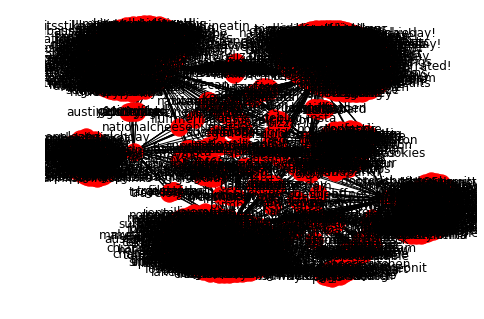

In [194]:
%pylab inline

nx.draw(B, with_labels=True)

In [212]:
#print(bipartite.is_bipartite(B))

c = bipartite.centrality.betweenness_centrality(B, hashtags)
c2 = dict(sorted(c.items(), key = lambda kv:kv[1], reverse=True))
c2

{'bestfoodaustin': 0.48222976427693937,
 'austinfoodstagram-insta': 0.4127065481344084,
 'keepaustineatin-insta': 0.37253221603386155,
 'atasteofkoko-insta': 0.19888747138348511,
 'austinfoodmagazine-insta': 0.12742574817626873,
 'thedanggoodlife': 0.11852393647708481,
 'austin': 0.041551875201509825,
 'eatingatx': 0.03978628845627539,
 '512_eats-insta': 0.03247234532949219,
 'ad': 0.029634413155551122,
 'acleats': 0.0256168961422764,
 'atx': 0.024367686508587835,
 'vegan': 0.02324402758943206,
 'shelbysorrel': 0.02310011501668203,
 'sxsw': 0.02162380463737149,
 'nationaltacoday': 0.020912871543488386,
 'austinfoodstagram': 0.020161924011066687,
 'brunch': 0.020161924011066687,
 'pizza': 0.01940044469601032,
 'sundayfunday': 0.01919077667989147,
 'ramen': 0.017098358397655788,
 'happyhour': 0.015823217308947406,
 'austintx': 0.015217997375485097,
 'tacotuesday': 0.014554791057328492,
 'austinblog': 0.012348879042010591,
 'agirlfromtx-insta': 0.011964010158393204,
 'sponsored': 0.011723

In [213]:
c3 = {k: v for k, v in c2.items() if v > 0.01}

In [214]:
hashtags = []
handle = []
tuples = []

for i, item in enumerate(df_network['hashtags']):
    for list_item in item:
        if list_item in list(c3.keys()):
            if list_item not in list(set(df_network['insta_handle'])):
                hashtags.append(list_item.lower())
                handle.append(df_network['insta_handle'].iloc[i])
                tuples.append((df_network['insta_handle'].iloc[i], list_item.lower()))

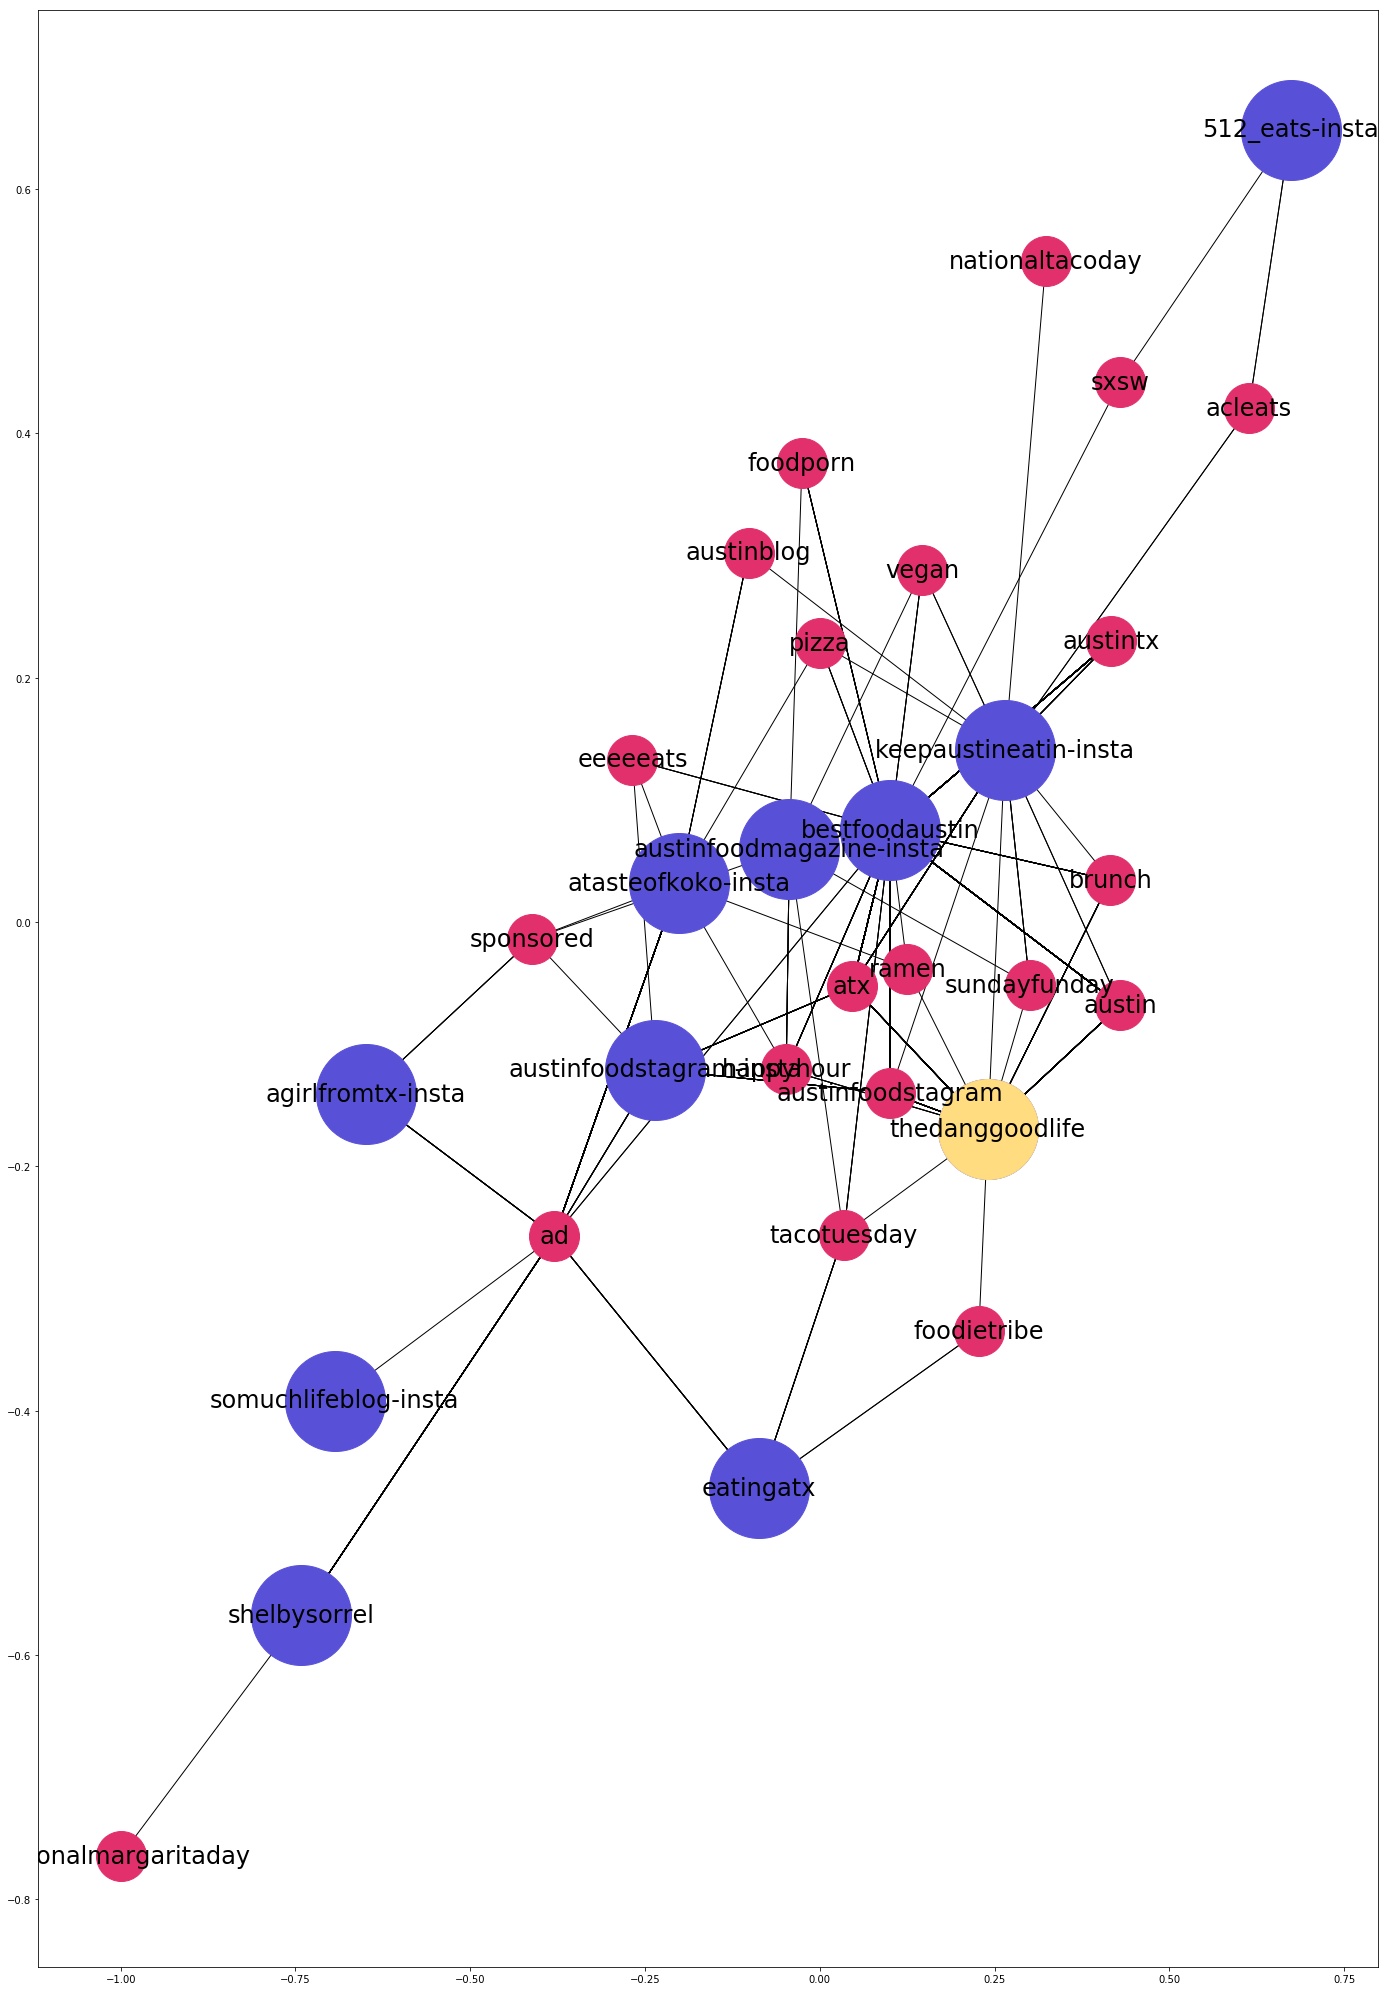

In [272]:
B2 = nx.Graph()
B2.add_nodes_from(list(set(handle)), bipartite = 1)
B2.add_nodes_from(list(set(hashtags)), bipartite = 0)
B2.add_edges_from(tuples)

pos=nx.spring_layout(B2)
nx.draw_networkx_nodes(B2, pos, nodelist=list(set(handle) - set('thedanggoodlife')), node_color='#5851D8', node_size=10000)
nx.draw_networkx_nodes(B2, pos, nodelist=['thedanggoodlife'], node_color='#FFDC80', node_size=10000)
nx.draw_networkx_nodes(B2, pos, nodelist=list(set(hashtags)), node_color='#E1306C', node_size=2500)
nx.draw_networkx_edges(B2, pos, edgelist=tuples)

# labels
labels = list(set(handle)).append(list(set(hashtags)))
nx.draw_networkx_labels(B2, pos, labels, font_size=24)

plt.savefig('tdgl-hashtags-network2.png', bbox_inches='tight')
plt.show()

In [223]:
c4 = bipartite.clustering(B2)

In [225]:
c5 = dict(sorted(c4.items(), key = lambda kv:kv[1], reverse=True))

In [275]:
c5

{'brunch': 0.43672839506172845,
 'austin': 0.43672839506172845,
 'austintx': 0.3949074074074075,
 'atx': 0.383249791144528,
 'austinfoodstagram': 0.383249791144528,
 'happyhour': 0.379513888888889,
 'nationaltacoday': 0.37878787878787884,
 'pizza': 0.37631578947368427,
 'vegan': 0.3654970760233919,
 'ramen': 0.3604166666666667,
 'sundayfunday': 0.328125,
 'eeeeeats': 0.31968253968253973,
 'tacotuesday': 0.31656746031746036,
 'foodporn': 0.3038888888888888,
 'somuchlifeblog-insta': 0.29126984126984123,
 'acleats': 0.2902777777777778,
 'austinblog': 0.2869791666666667,
 'agirlfromtx-insta': 0.2826530612244898,
 'foodietribe': 0.26730769230769236,
 'thedanggoodlife': 0.2513986013986014,
 'sxsw': 0.24464285714285716,
 'shelbysorrel': 0.24027777777777778,
 'sponsored': 0.21696428571428572,
 'austinfoodstagram-insta': 0.21385281385281385,
 'bestfoodaustin': 0.20690162907268173,
 'atasteofkoko-insta': 0.19598080750041535,
 'ad': 0.19374416433239963,
 'keepaustineatin-insta': 0.175155203781917